# 量子コンピューティング 第2回

Kifumi Numata, IBM Quantum (Jun 13, 2025)

## 目次
1. 量子回路    
   1.1 すべての情報はビットである    
   1.2 回路図を使った計算    
2. 単一量子ビット回路    
   2.1 量子状態とブロッホ球    
   2.2 量子状態とユニタリー行列    
   演習1. 単一量子ビット回路   
   2.3 測定    
3. 複数量子ビット回路ともつれ状態    
   3.1 複数量子ビット回路    
   3.2 複数量子ゲート    
   3.3 量子もつれと実デバイスでの測定    
   演習2. 量子もつれと実デバイスでの測定     
   演習3. 別のベル状態の作成    
   3.4 GHZ状態     
   演習4. 8量子ビットのGHZ状態    

# 1. 量子回路

## 1.1 すべての情報はビットである

例えば 9213 という数は10進数表現されています。

$$ (9\times10^3) + (2\times10^2) + (1\times10^1) + (3\times10^0) $$

これを二進数表現すると、10001111111101 になります。
$$
\begin{aligned}
9213  &= (1 \times 2^{13}) + (0 \times 2^{12}) + (0 \times 2^{11}) + (0 \times 2^{10}) \\
 &+ (1 \times 2^9) + (1 \times 2^8) + (1 \times 2^7) + (1 \times 2^6) \\
 &+ (1 \times 2^5) + (1 \times 2^4) + (1 \times 2^3) + (1 \times 2^2) \\
 &+ (0 \times 2^1) + (1 \times 2^0) 
\end{aligned}
$$

## 1.2 回路図を使った計算

量子ビットを使用する場合もビットを使用する場合も、入力を必要な出力に変換するためにそれらを操作する必要があります。少数のビット用の非常に単純なプログラムでは、このプロセスを **回路図** と呼ばれる図で表すと便利です。    
左下の図が古典回路の例、右下の図が量子回路の例です。
どちらの場合も、左側に入力があり、出力が右側で、その間に演算が記号によって表されます。演算に用いられる記号は、主に歴史的な背景から「ゲート」と呼ばれます。

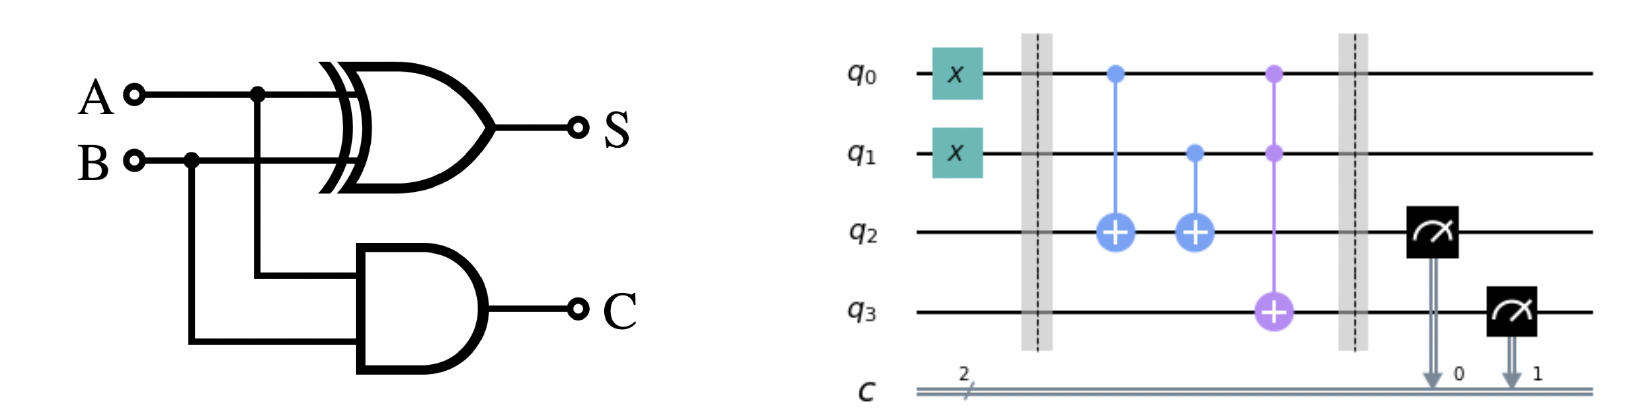

# 2. 単一量子ビット回路


## 2.1 量子状態とブロッホ球

量子ビットの状態は、$|0\rangle$と$|1\rangle$ の重ね合わせの状態で表します。任意の量子ビットは以下のように表します。

$$|\psi\rangle =\alpha|0\rangle+ \beta|1\rangle$$ 

ここで $\alpha$ と $\beta$ は、 $|\alpha|^2+|\beta|^2=1$ を満たす複素数で、確率振幅と呼ばれます。

$|0\rangle$と$|1\rangle$は、
$|0\rangle = \begin{bmatrix}
1 \\
0
\end{bmatrix}$、
$|1\rangle = \begin{bmatrix}
0\\
1
\end{bmatrix}$
とかけるので、

$$|\psi\rangle = \alpha\begin{bmatrix}
1 \\
0
\end{bmatrix}+ \beta\begin{bmatrix}0\\
1
\end{bmatrix} = \begin{bmatrix}
\alpha \\
\beta
\end{bmatrix}$$

とも表すことができ、これから量子ビットの状態は、$|0\rangle$と$|1\rangle$を正規直交基底とする2次元の複素内積空間の単位ベクトルであることがわかります。その大きさは1に規格化されています。
$$\langle\psi|\psi\rangle = \begin{bmatrix}
\alpha^* & \beta^*
\end{bmatrix}
\begin{bmatrix}
\alpha \\
\beta
\end{bmatrix} = 1$$

$|\psi\rangle =\begin{bmatrix}
\alpha \\
\beta
\end{bmatrix}$ は状態ベクトルとも呼びます。

1量子ビットの状態は **ブロッホ球** を使うと理解しやすいです。このとき、$|\psi\rangle =\cos\frac{\theta}{2}|0\rangle+e^{i\varphi}\sin\frac{\theta}{2}|1\rangle= 
\left(
\begin{matrix}
\cos\frac{\theta}{2}\\
e^{i\varphi}\sin\frac{\theta}{2}
\end{matrix}
\right)
$ です。
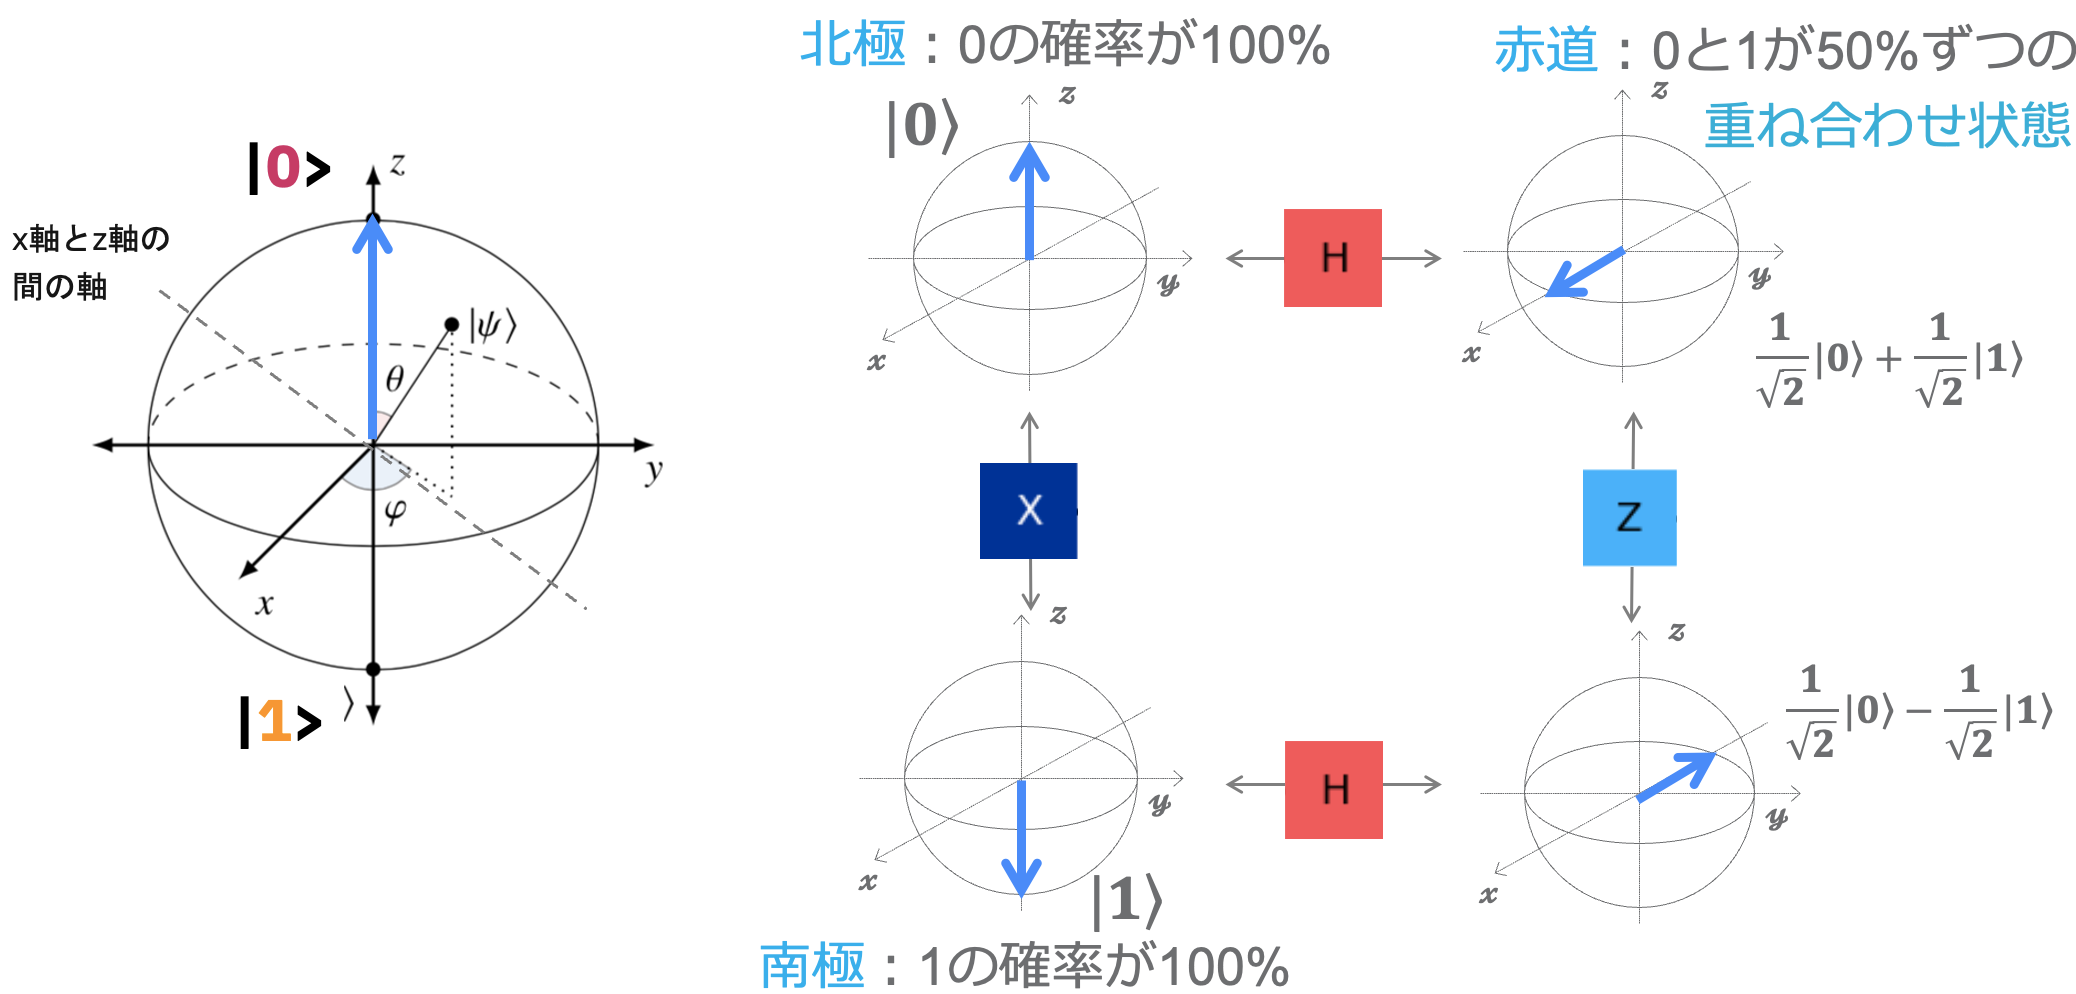

量子演算について、Qiskitで基本的な計算方法を学びます。     
コードセルは、セルを選択して「Shift」＋「Enter」で実行できます。まずライブラリーをインポートします。

In [ ]:
# Google Colabを使っている場合、次の行の # を外して実行してください
#!pip install qiskit[visualization] qiskit-aer qiskit-ibm-runtime 

In [ ]:
# Import the qiskit libraty

from qiskit import QuantumCircuit
from qiskit_aer import StatevectorSimulator, AerSimulator

### 空の回路
1量子ビットの回路を作成し、描画します。

In [ ]:
# １量子ビット回路を用意
qc = QuantumCircuit(1)

# 回路を描画
qc.draw(output="mpl")

In [ ]:
# 状態ベクトルシミュレーターの実行
backend = StatevectorSimulator()
result = backend.run(qc).result().get_statevector(qc, decimals=3)
print(result)

# ブロッホ球の表示
from qiskit.visualization import plot_bloch_multivector
plot_bloch_multivector(result)

### Xゲート
Xゲートはブロッホ球の$x$軸周りの$\pi$回転です。
$|0\rangle$にXゲートを適用すると$|1\rangle$、$|1\rangle$にXゲートを適用すると$|0\rangle$になるので、古典のNOTゲートのような操作が実現でき、ビット反転とも呼ばれます。

$X = \begin{pmatrix}
0 & 1 \\
1 & 0 \\
\end{pmatrix}$

In [ ]:
qc = QuantumCircuit(1)    # １量子ビット回路を用意

# Xゲートを0番目の量子ビットに操作します。
qc.x(0)

# 回路を描画
qc.draw(output="mpl")

IBM Quantumでは、初期状態は$|0\rangle$にセットされていますので、上記の量子回路は、行列ベクトル表示では

$X|0\rangle=  \begin{pmatrix}
0 & 1 \\\
1 & 0
\end{pmatrix} 
\begin{pmatrix}
1 \\\
0
\end{pmatrix} 
 =\begin{pmatrix}
0 \\\
1
\end{pmatrix} = |1\rangle$ 

となります。次にこの回路の出力ベクトルを状態ベクトルシミュレーターを使って実行してみます。

In [ ]:
# 状態ベクトルシミュレーターの実行
backend = StatevectorSimulator()
result = backend.run(qc).result().get_statevector(qc, decimals=3)
print(result)

# ブロッホ球の表示
from qiskit.visualization import plot_bloch_multivector
plot_bloch_multivector(result)

縦ベクトルが横ベクトル表示で、複素数(虚部の添字は j )で表示されています。

### Hゲート

Hadamardゲート(アダマールゲート)はブロッホ球の$x$軸と$z$軸の中間の軸周りの$\pi$回転です。
例えば$|0\rangle$にHゲートを適用すると、$\frac{|0\rangle + |1\rangle}{\sqrt{2}}$のような重ね合わせ状態を作ることができます。

$H = \frac{1}{\sqrt{2}}\begin{pmatrix}
1 & 1 \\
1 & -1 \\
\end{pmatrix}$

In [ ]:
qc = QuantumCircuit(1)    # １量子ビット回路を用意 

# Hゲートを0番目の量子ビットに操作します。
qc.h(0)

# 回路を描画
qc.draw(output="mpl")

In [ ]:
# 状態ベクトルシミュレーターの実行
backend = StatevectorSimulator()
result = backend.run(qc).result().get_statevector(qc, decimals=3)
print(result)

# ブロッホ球の表示
plot_bloch_multivector(result)

これは、$H|0\rangle= \frac{1}{\sqrt{2}} \begin{pmatrix}
1 & 1 \\\
1 & -1
\end{pmatrix} 
\begin{pmatrix}
1 \\\
0
\end{pmatrix} 
 =\frac{1}{\sqrt{2}}\begin{pmatrix}
1 \\\
1
\end{pmatrix} 
=\begin{pmatrix}
0.707 \\\
0.707
\end{pmatrix} 
=\frac{1}{\sqrt{2}}（|0\rangle+|1\rangle)$ です。




$H$ゲートを$|0\rangle$に実行すると、$|0\rangle$と$|1\rangle$の均等な重ね合わせ状態が作れることが分かります。


### $|-\rangle$状態

In [ ]:
qc = QuantumCircuit(1)    # １量子ビット回路を用意 

# Xゲートを0番目の量子ビットに操作します。
qc.x(0)

# 次にHゲートを0番目の量子ビットに操作します。
qc.h(0)

# 回路を描画
qc.draw(output="mpl")

In [ ]:
# 状態ベクトルシミュレーターの実行
backend = StatevectorSimulator()
result = backend.run(qc).result().get_statevector(qc, decimals=3)
print(result)

# ブロッホ球の表示
plot_bloch_multivector(result)

$H|1\rangle= \frac{1}{\sqrt{2}} \begin{pmatrix}
1 & 1 \\\
1 & -1
\end{pmatrix} 
\begin{pmatrix}
0 \\\
1
\end{pmatrix} 
 =\frac{1}{\sqrt{2}}\begin{pmatrix}
1 \\\
-1
\end{pmatrix} 
=\begin{pmatrix}
0.707 \\\
-0.707
\end{pmatrix} 
=\frac{1}{\sqrt{2}}（|0\rangle-|1\rangle)$


$|1\rangle$に$H$ゲートを実行した結果、$|0\rangle$と$|1\rangle$の均等な重ね合わせ状態になりますが、$|1\rangle$の符号がマイナスになります。

$$|0\rangle \langle 0|= 
\begin{bmatrix}
1 & 0
\end{bmatrix}
\begin{bmatrix}
1 \\
0
\end{bmatrix}
=\begin{pmatrix}
1 & 0 \\
0 & 0 \\
\end{pmatrix}$$

## 2.2 量子状態とユニタリー行列

これまでQiskitで確認した量子状態の変化は、ユニタリー行列をかけることで表されます。
$$|\psi^{'}\rangle = U|\psi\rangle$$

ユニタリー行列とは、以下を満たす行列でした。
$$U^{\dagger}U =U U^{\dagger} = I$$

このユニタリー行列による変化が量子ビットに量子ゲートをかけることを意味します。代表的な1量子ビットゲートには以下のものがあります。　

パウリゲート

$$X = \begin{pmatrix}
0 & 1 \\
1 & 0 \\
\end{pmatrix}
= |0\rangle \langle 1|+|1\rangle \langle 0|$$
$$Y = \begin{pmatrix}
0 & -i \\
i & 0 \\
\end{pmatrix}
= -i|0\rangle \langle 1|+i|1\rangle \langle 0|$$
$$Z = \begin{pmatrix}
1 & 0 \\
0 & -1 \\
\end{pmatrix}
= |0\rangle \langle 0|-|1\rangle \langle 1|$$

ここで、外積は以下のように計算されました。
$$|0\rangle \langle 0|= 
\begin{bmatrix}
1 \\
0
\end{bmatrix}
\begin{bmatrix}
1 & 0
\end{bmatrix}
=\begin{bmatrix}
1 & 0 \\
0 & 0 \\
\end{bmatrix}, \quad
|1\rangle \langle 0|= 
\begin{bmatrix}
0 \\
1
\end{bmatrix}
\begin{bmatrix}
1 & 0
\end{bmatrix}
=\begin{bmatrix}
0 & 0 \\
1 & 0 \\
\end{bmatrix}, \quad$$

$$|0\rangle \langle 1|= 
\begin{bmatrix}
1 \\
0
\end{bmatrix}
\begin{bmatrix}
0 & 1
\end{bmatrix}
=\begin{bmatrix}
0 & 1 \\
0 & 0 \\
\end{bmatrix}, \quad
|1\rangle \langle 1|= 
\begin{bmatrix}
0 \\
1
\end{bmatrix}
\begin{bmatrix}
0 & 1
\end{bmatrix}
=\begin{bmatrix}
0 & 0 \\
0 & 1 \\
\end{bmatrix}, \quad$$

そのほかの代表的な1量子ビットゲート

$$H= \frac{1}{\sqrt{2}}\begin{bmatrix}
1 & 1 \\
1 & -1 \\
\end{bmatrix},\quad
S = \begin{bmatrix}
1 & 0 \\
0 & -i \\
\end{bmatrix}, \quad
T = \begin{bmatrix}
1 & 0 \\
0 & exp(i\pi/4) \\
\end{bmatrix}$$

$$ R_x(\theta) = e^{-i\theta X/2} = cos\frac{\theta}{2}I - i sin \frac{\theta}{2}X = \begin{bmatrix}
cos\frac{\theta}{2} &  -i sin \frac{\theta}{2} \\
-i sin \frac{\theta}{2} & cos\frac{\theta}{2} \\
\end{bmatrix}$$

$$ R_y(\theta) = e^{-i\theta Y/2} = cos\frac{\theta}{2}I - i sin \frac{\theta}{2}Y = \begin{bmatrix}
cos\frac{\theta}{2} &  - sin \frac{\theta}{2} \\
sin \frac{\theta}{2} & cos\frac{\theta}{2} \\
\end{bmatrix}$$

$$ R_z(\theta) = e^{-i\theta Z/2} = cos\frac{\theta}{2}I - i sin \frac{\theta}{2}Z = \begin{bmatrix}
e^{-i\theta /2} &  0 \\
0 & e^{i\theta /2} \\
\end{bmatrix}$$$$$$

## 演習1
次の量子回路をプログラミングし、状態ベクトルシミュレーターで実行して、ブロッホ球を表示してみましょう。

(1) $XX|0\rangle$

(2) $HH|0\rangle$  

(3) $ZH|1\rangle$

ヒント：Zゲートはブロッホ球の$z$軸周りの$\pi$回転です。位相反転とも呼ばれ、`qc.z(0)` のようにコーデイングします。

$Z = \begin{pmatrix}
1 & 0 \\
0 & -1 \\
\end{pmatrix}$
    
新しいセルを追加したい場合は、上側の「+」を選択するか、キーボードの「B」を押します。

In [ ]:
### (1) XX|0> ###

# １量子ビット回路を用意 
##コードを記入します##

# Xゲートを0番目の量子ビットに操作します。
##コードを記入します##

# もう一度、Xゲートを0番目の量子ビットに操作します。
##コードを記入します##

# 回路を描画
qc.draw(output="mpl")

In [ ]:
# 状態ベクトルシミュレーターの実行
backend = StatevectorSimulator()
result = backend.run(qc).result().get_statevector(qc, decimals=3)
print(result)

# ブロッホ球の表示
plot_bloch_multivector(result)

In [ ]:
### (2) HH|0> ###
##コードを記入します##

qc.draw("mpl")

In [ ]:
# 状態ベクトルシミュレーターの実行
backend = StatevectorSimulator()
result = backend.run(qc).result().get_statevector(qc, decimals=3)
print(result)

# ブロッホ球の表示
plot_bloch_multivector(result)

In [ ]:
### (3) ZH|1> ###
##コードを記入します##

qc.draw("mpl")

In [ ]:
# 状態ベクトルシミュレーターの実行
backend = StatevectorSimulator()
result = backend.run(qc).result().get_statevector(qc, decimals=3)
print(result)

# ブロッホ球の表示
plot_bloch_multivector(result)

## 2.3 測定

量子ビット $|\psi\rangle=\alpha|0\rangle+\beta|1\rangle$ は観測することによって、 $|0\rangle$または$|1\rangle$へ状態が変わります。そのとき、 $|0\rangle$を得る確率は、$|\alpha|^2$ であり、$|1\rangle$を得る確率は、$|\beta|^2$ です（ボルンの法則）。

$$p(|0\rangle) = |\langle 0|\psi\rangle|^2 = |\alpha|^2$$
$$p(|1\rangle) = |\langle 1|\psi\rangle|^2 = |\beta|^2$$

例えば、$|\psi\rangle=\frac{1}{\sqrt{2}}(|0\rangle+|1\rangle)$ を測定すると

$$\langle 0|\psi\rangle =\frac{1}{\sqrt{2}}\langle 0|0\rangle + \frac{1}{\sqrt{2}}\langle 0|1\rangle = \frac{1}{\sqrt{2}}\cdot 1+\frac{1}{\sqrt{2}} \cdot 0=\frac{1}{\sqrt{2}} $$
$$|\langle 0|\psi\rangle|^2 =  \frac{1}{2} $$

となり、50%の確率で$|0\rangle$が測定（50%の確率で$|1\rangle$が測定）されます。

測定するためには量子回路に測定ゲートを追加します。

In [ ]:
qc = QuantumCircuit(1,1) # 1量子ビットと1古典ビットの回路を作成します。
qc.h(0)
qc.measure(0,0) # 測定ゲートを追加

qc.draw(output="mpl")

Aerシミュレーター（量子計算シミュレーター）で計算させ、測定します。1024回実行した結果、それぞれの状態が測定された回数を表示し、その測定確率をヒストグラムで表示します。

In [ ]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2 as Sampler

# シミュレーターで実験
backend = AerSimulator()
# 回路を最適化
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_qc = pm.run(qc)
# Samplerで実行
sampler = Sampler(backend)
job = sampler.run([isa_qc])
result = job.result()

#  測定された回数を表示
counts = result[0].data.c.get_counts()
print(f" > Counts: {counts}")

## ヒストグラムで測定された確率をプロット
from qiskit.visualization import plot_histogram
plot_histogram( counts )

ほぼ50％ずつの確率で0と1が測定されることが確認できました。

# 3. 複数量子ビット回路ともつれ状態

## 3.1 複数量子ビット回路

In [ ]:
# ２量子ビット回路を作成します。
qc = QuantumCircuit(2)

# Hゲートを0番目の量子ビットに操作します。
qc.h(0)

# Hゲートを1番目の量子ビットに操作します。
qc.h(1)

# 回路を描画
qc.draw(output="mpl")

In [ ]:
# 状態ベクトルシミュレーターの実行
backend = StatevectorSimulator()
result = backend.run(qc).result().get_statevector(qc, decimals=3)
print(result)

２量子ビットの状態は、１量子ビットの積（テンソル積）で表せます。

$|\psi\rangle=|q0\rangle \otimes|q1\rangle = (a|0\rangle+b|1\rangle) \otimes (c|0\rangle+d|1\rangle) $

$= ac|0\rangle|0\rangle+ad|0\rangle|1\rangle+bc|1\rangle|0\rangle+bd|1\rangle|1\rangle$

$= ac|00\rangle+ad|01\rangle+bc|10\rangle+bd|11\rangle$

(ただし、$|ac|^2+ |ad|^2+ |bc|^2+ |bd|^2=1$ )


Qiskitの初期値は、$|0\rangle|0\rangle=|00\rangle$なので、$H$をそれぞれの量子ビットに操作させることで均等な重ね合わせの状態になります。

$H|0\rangle \otimes H|0\rangle=\frac{1}{\sqrt{2}}(|0\rangle+|1\rangle) \otimes \frac{1}{\sqrt{2}}(|0\rangle+|1\rangle) = \frac{1}{2}(|00\rangle+|01\rangle+|10\rangle+|11\rangle)$

$$ 
=\frac{1}{2}\left( \begin{bmatrix} 1 \\ 1 \end{bmatrix} \otimes \begin{bmatrix} 1 \\ 1 \end{bmatrix}\right) = \frac{1}{2}\begin{bmatrix} 1 \\ 1 \\ 1 \\ 1 \end{bmatrix}=\frac{1}{2}\left(\begin{bmatrix} 1 \\ 0 \\ 0 \\ 0 \end{bmatrix}+\begin{bmatrix} 0 \\ 1 \\ 0 \\ 0 \end{bmatrix}+\begin{bmatrix} 0 \\ 0 \\ 1 \\ 0 \end{bmatrix}+\begin{bmatrix} 0 \\ 0 \\ 0 \\ 1 \end{bmatrix}\right)
$$

測定のルールも同じで、 $|00\rangle$ を測定する確率は、以下のように計算されます。
$$p(|00\rangle) = |\langle 00|\psi\rangle|^2 = |ac|^2$$

In [ ]:
# ブロッホ球の表示
plot_bloch_multivector(result)

次に、この状態を測定してみましょう。

まず、測定回路を追加します。

In [ ]:
# ２量子ビットと2古典ビットの回路を作成します。
qc = QuantumCircuit(2,2)

# ゲートを適用します。
qc.h(0)
qc.h(1)

# 測定ゲートを追加
qc.measure(0, 0)
qc.measure(1, 1)

# 回路を描画
qc.draw(output="mpl")

次にAerシミュレーター（量子計算シミュレーター）で計算させ、測定します。1024回実行した結果、それぞれの状態が測定された回数を表示し、その測定確率をヒストグラムで表示します。

In [ ]:
# シミュレーターで実験
backend = AerSimulator()
# 回路を最適化
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_qc = pm.run(qc)
# Samplerで実行
sampler = Sampler(backend)
job = sampler.run([isa_qc])
result = job.result()

#  測定された回数を表示
counts = result[0].data.c.get_counts()
print(f" > Counts: {counts}")

## ヒストグラムで測定された確率をプロット
plot_histogram( counts )

$|00\rangle$、$|01\rangle$、$|10\rangle$、$|11\rangle$の状態がほぼ25%ずつ均等に測定されました。

## 3.2 複数量子ゲート

代表的な複数量子ゲートである $CNOT$ゲート（$CX$ゲート）は、２量子ビットにかかる量子ゲートで、制御ビットが1のときのみ、目標ビットの値を反転します。　　　　
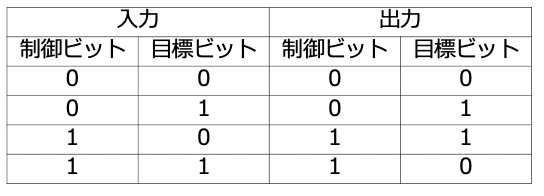

まず、q0とq1が両方とも0の場合を計算してみましょう。

In [ ]:
# ２量子ビット回路を作成します。 
qc = QuantumCircuit(2,2)

# q0, q1が0の場合
qc.cx(0,1)   # CNOTゲートの制御ビットをq0、目標ビットをq1にセットします。

# 回路を描画
qc.draw(output="mpl")

In [ ]:
## 状態ベクトルシミュレーターの実行
backend = StatevectorSimulator()
result = backend.run(qc).result().get_statevector(qc, decimals=3)
print(result)

$|00\rangle$ に$CX$ゲートを操作しても$|00\rangle$ のままです。

次に、$|01\rangle$ に$CX$ゲートを操作します。

ここで、Qiskitでは、最下位ビット(LSB)が右端で、多くの量子情報の教科書とは逆であることに注意してください。つまり、1量子ビット目が一番右のビットで、2量子ビット目が右から２番目のビットです。$|01\rangle$ とは、q0が1で、q1が0を表しています。


In [ ]:
qc = QuantumCircuit(2,2)

# q0=1, q1=0の場合
qc.x(0)    # q0を1にします。
qc.cx(0,1)   # CNOTゲートの制御ゲートをq0、目標ゲートをq1にセットします。

# 回路を描画
qc.draw(output="mpl")

In [ ]:
# 状態ベクトルシミュレーターの実行
backend = StatevectorSimulator()
result = backend.run(qc).result().get_statevector(qc, decimals=3)
print(result)

$|01\rangle$ に$CX$ゲートを操作すると$|11\rangle$ になりました。

シミュレーターで計算してみましょう。

In [ ]:
# 回路を測定
qc.measure(0, 0)
qc.measure(1, 1)

# 回路を描画
qc.draw(output="mpl")

In [ ]:
# シミュレーターで実験
backend = AerSimulator()
# 回路を最適化
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_qc = pm.run(qc)
# Samplerで実行
sampler = Sampler(backend)
job = sampler.run([isa_qc])
result = job.result()

#  測定された回数を表示
counts = result[0].data.c.get_counts()
print(f" > Counts: {counts}")

## ヒストグラムで測定された確率をプロット
plot_histogram( counts )

$|11\rangle$の状態が100%測定されます。


## 3.3 量子もつれと実デバイスでの測定

量子計算上でも重要な状態となる、量子もつれ状態（エンタングルメント状態）を生成してみましょう。

2量子ビットの量子もつれ状態の1つの例が次のような形になります。
$$\frac{1}{\sqrt{2}}|00\rangle + \frac{1}{\sqrt{2}}|11\rangle$$




2つの量子状態がエンタングルした状態とは、量子状態$|\psi\rangle _A$と$|\psi\rangle _B$からなる状態$|\psi\rangle _{AB}$が、個別の量子状態のテンソル積では表せない状態です。

$$|\psi\rangle _{AB}= \frac{1}{\sqrt{2}} (|00\rangle + |11\rangle) = \frac{1}{\sqrt{2}}(|0\rangle_A|0\rangle_B +|1\rangle_A|1\rangle_B)$$

の個別の状態を以下とすると、

$$|\psi\rangle _A= a_0|0\rangle+a_1|1\rangle$$
$$|\psi\rangle _B= b_0|0\rangle+b_1|1\rangle$$

この2つの状態のテンソル積は
$$|\psi\rangle _A\otimes |\psi\rangle _B = a_0 b_0|00\rangle+a_0 b_1|01\rangle+a_1 b_0|10\rangle+a_1 b_1|11\rangle$$
となりますが、これを満たす $a_0, a_1, b_0, b_1$ はありません。

では、演習2で実際にこの量子状態を作ってみましょう。<br>


## 演習2

(1) 次の回路をプログラミングし、Aerシミュレーターを実行して、結果をヒストグラムで表示してください。$|00\rangle$と$|11\rangle$がほぼ半分ずつになることを確認します。
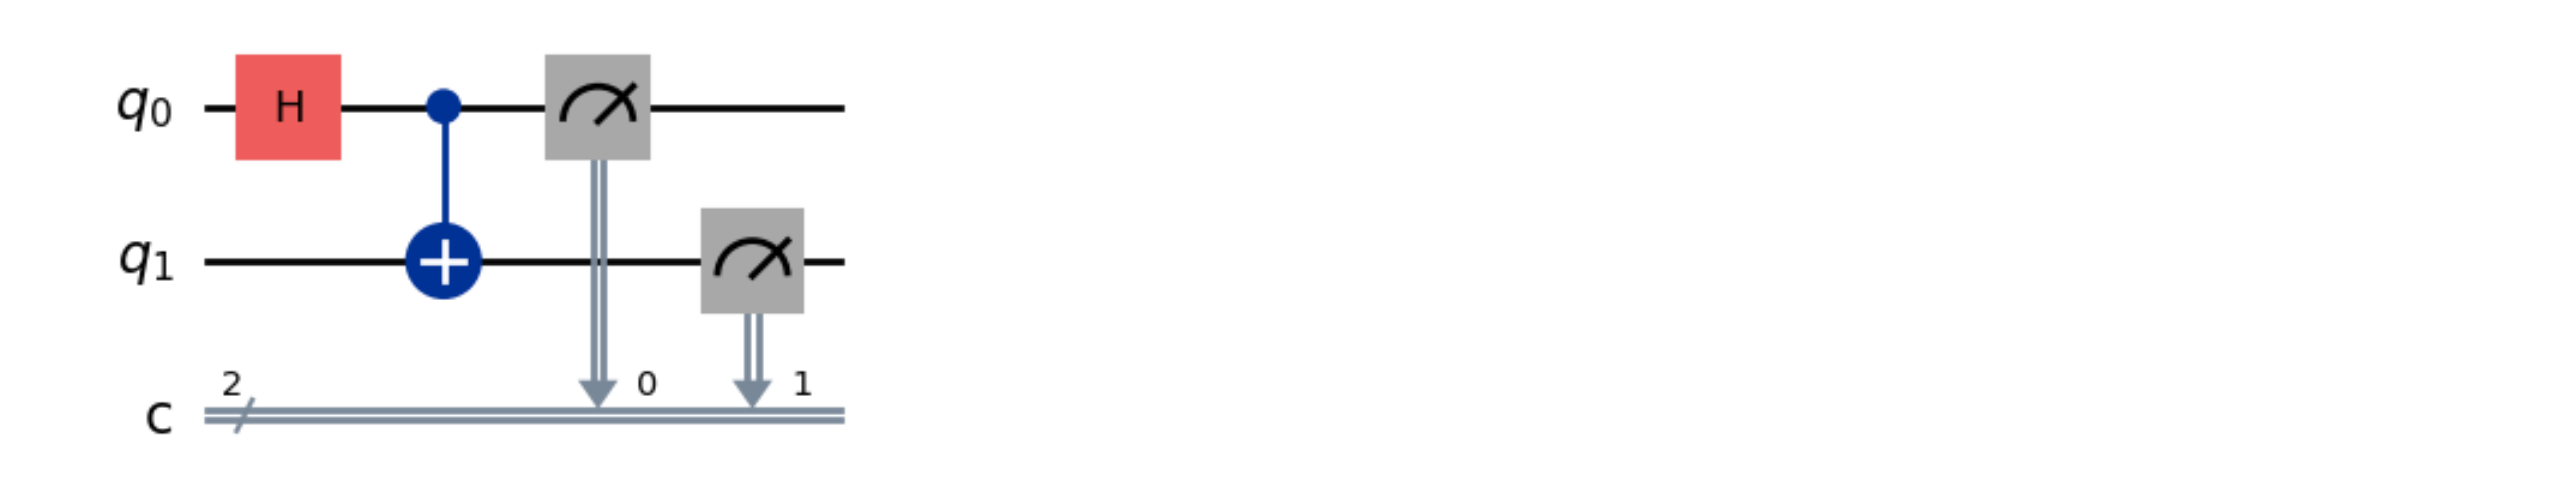

In [ ]:
# 2量子ビット回路の用意
qc = ##コードを記入します##

# 2量子ビットのエンタングルメント回路の作成
qc.##コードを記入します##
qc.##コードを記入します##

# 回路を測定
qc.##コードを記入します##
qc.##コードを記入します## 

# 回路を描画
qc.draw(output="mpl")

In [ ]:
# シミュレーターで実験
backend = AerSimulator()
# 回路を最適化
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_qc = pm.run(qc)
# Samplerで実行
sampler = Sampler(backend)
job = sampler.run([isa_qc])
result = job.result()

#  測定された回数を表示
counts = result[0].data.c.get_counts()
print(f" > Counts: {counts}")

## ヒストグラムで測定された確率をプロット
from qiskit.visualization import plot_histogram
plot_histogram( counts )

(2) 以下のコードを実行して実デバイスで計算してみましょう。

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService

# local環境で初めて実行する場合は、認証情報をディスクに保存します：
# QiskitRuntimeService.save_account(channel='ibm_quantum', instance='ibm-q/open/main', token='<IBM Quantum API key>')

service = QiskitRuntimeService()

In [ ]:
service.backends()

In [ ]:
# 以下でデバイスを指定できます。
backend = service.backend('ibm_brisbane')

In [ ]:
#一番空いているバックエンドを自動的に選択することもできます
backend = service.least_busy(operational=True)
print("最も空いているバックエンドは: ", backend)

In [ ]:
# 回路を実機で実行可能な基底ゲートにトランスパイルします
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(qc)
isa_circuit.draw("mpl", idle_wires=False)

In [ ]:
# Samplerで実行します
sampler = Sampler(backend)
job = sampler.run([isa_circuit])

print("job id:", job.job_id()) # job idの確認

In [ ]:
# ジョブの実行状態を確認します
job.status()

In [ ]:
# 待ち時間が長い時に後から結果を確認する場合
from qiskit_ibm_runtime import QiskitRuntimeService
# for Google Colab users
#service = QiskitRuntimeService(channel='ibm_quantum',instance='ibm-q/open/main',token='<IBM Quantum API key>')
# for local Qiskit users
service = QiskitRuntimeService()
job = service.job('d0g3b9iajbbc73dvuoig') # 例です。上に出力された自分のjob_idを入れて実行してください。
job.status()

In [ ]:
# ジョブの実行状態を確認します
job.status()

In [ ]:
### job has successfully runになってから実行します ###
result = job.result()
print(f" > Counts: {result[0].data.c.get_counts()}")

In [ ]:
from qiskit.visualization import plot_histogram
plot_histogram(result[0].data.c.get_counts())

## 演習 3 

(1) 次の量子状態を作る量子回路をQiskitで作ってください。
$$ |\psi^+\rangle = \frac{1}{\sqrt{2}}(|01\rangle  + |10\rangle) $$

ヒント： 上で作った基本のエンタングルメント状態 $ |\phi^+\rangle=\frac{1}{\sqrt{2}}(|00\rangle  + |11\rangle) $ を作った後、あるゲートを一つ追加すると上記の状態 $ |\psi^+\rangle$ になります。この状態も２量子ビットのエンタングルメント状態の一つです。

In [ ]:
# 2量子ビット回路の用意
##コードを記入します##

# 回路の作成
##コードを記入します##



# 回路を測定
##コードを記入します##


# 回路を描画
qc.draw(output="mpl")

(2) シミュレーターで実行して、結果をヒストグラムで表示してください。（実行するだけです）

In [ ]:
# シミュレーターで実験
backend = AerSimulator()
# 回路を最適化
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_qc = pm.run(qc)
# Samplerで実行
sampler = Sampler(backend)
job = sampler.run([isa_qc])
result = job.result()

#  測定された回数を表示
counts = result[0].data.c.get_counts()
print(f" > Counts: {counts}")

## ヒストグラムで測定された確率をプロット
from qiskit.visualization import plot_histogram
plot_histogram( counts )

## 3.4 GHZ状態

3量子ビット以上が完全にエンタングルした状態をGHZ状態 (Greenberger–Horne–Zeilinger state) と呼びます。

$$\frac{1}{\sqrt 2}(|000\rangle + |111\rangle)$$

３量子ビットのGHZ状態は、次のような量子回路で作成することができます。

In [ ]:
qc = QuantumCircuit(3)

qc.h(0)
qc.cx(0,1)
qc.cx(1,2)

qc.measure_all()

qc.draw("mpl")

量子回路の「深さ」は、量子回路を評価する指標としてよく使われます。

QuantumCircuit.depth()で、量子回路の深さを調べることができ、上の回路の深さは4です。


In [ ]:
qc.depth()

## 演習 4

$8$ 量子ビットのGHZ状態は、以下のようになります。

$$\frac{1}{\sqrt 2}(|00000000\rangle + |11111111\rangle)$$

この状態を最も浅い回路で作ってみましょう。最も浅い量子回路の depth は、測定ゲートを合わせて 5 です！

In [ ]:
qc = QuantumCircuit(8,8)

# ここから下にコードを書きます





# ここから上にコードを書きます

# 測定
qc.measure_all()

qc.draw("mpl")
#print(qc.depth())

In [ ]:
print(qc.depth())

In [ ]:
# シミュレーターで実験
backend = AerSimulator()
# 回路を最適化
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_qc = pm.run(qc)
# Samplerで実行
sampler = Sampler(backend)
job = sampler.run([isa_qc])
result = job.result()

#  測定された回数を表示
counts = result[0].data.meas.get_counts()
print(f" > Counts: {counts}")

## ヒストグラムで測定された確率をプロット
from qiskit.visualization import plot_histogram
plot_histogram( counts )

## 参考課題: Qiskit Global Summer School 

毎年夏に開催されるオンラインの Qiskit夏の学校が、今年はInternational Year of Quantum Science and Technology を記念した豪華版になっています。開催期間は、7月7日から22日で、Labをすべて完了するとデジタルバッジがもらえます。一般応募枠は終わってしまったので、お客様向け特別枠からお申し込みください：https://ibm.biz/QGSS-QIC

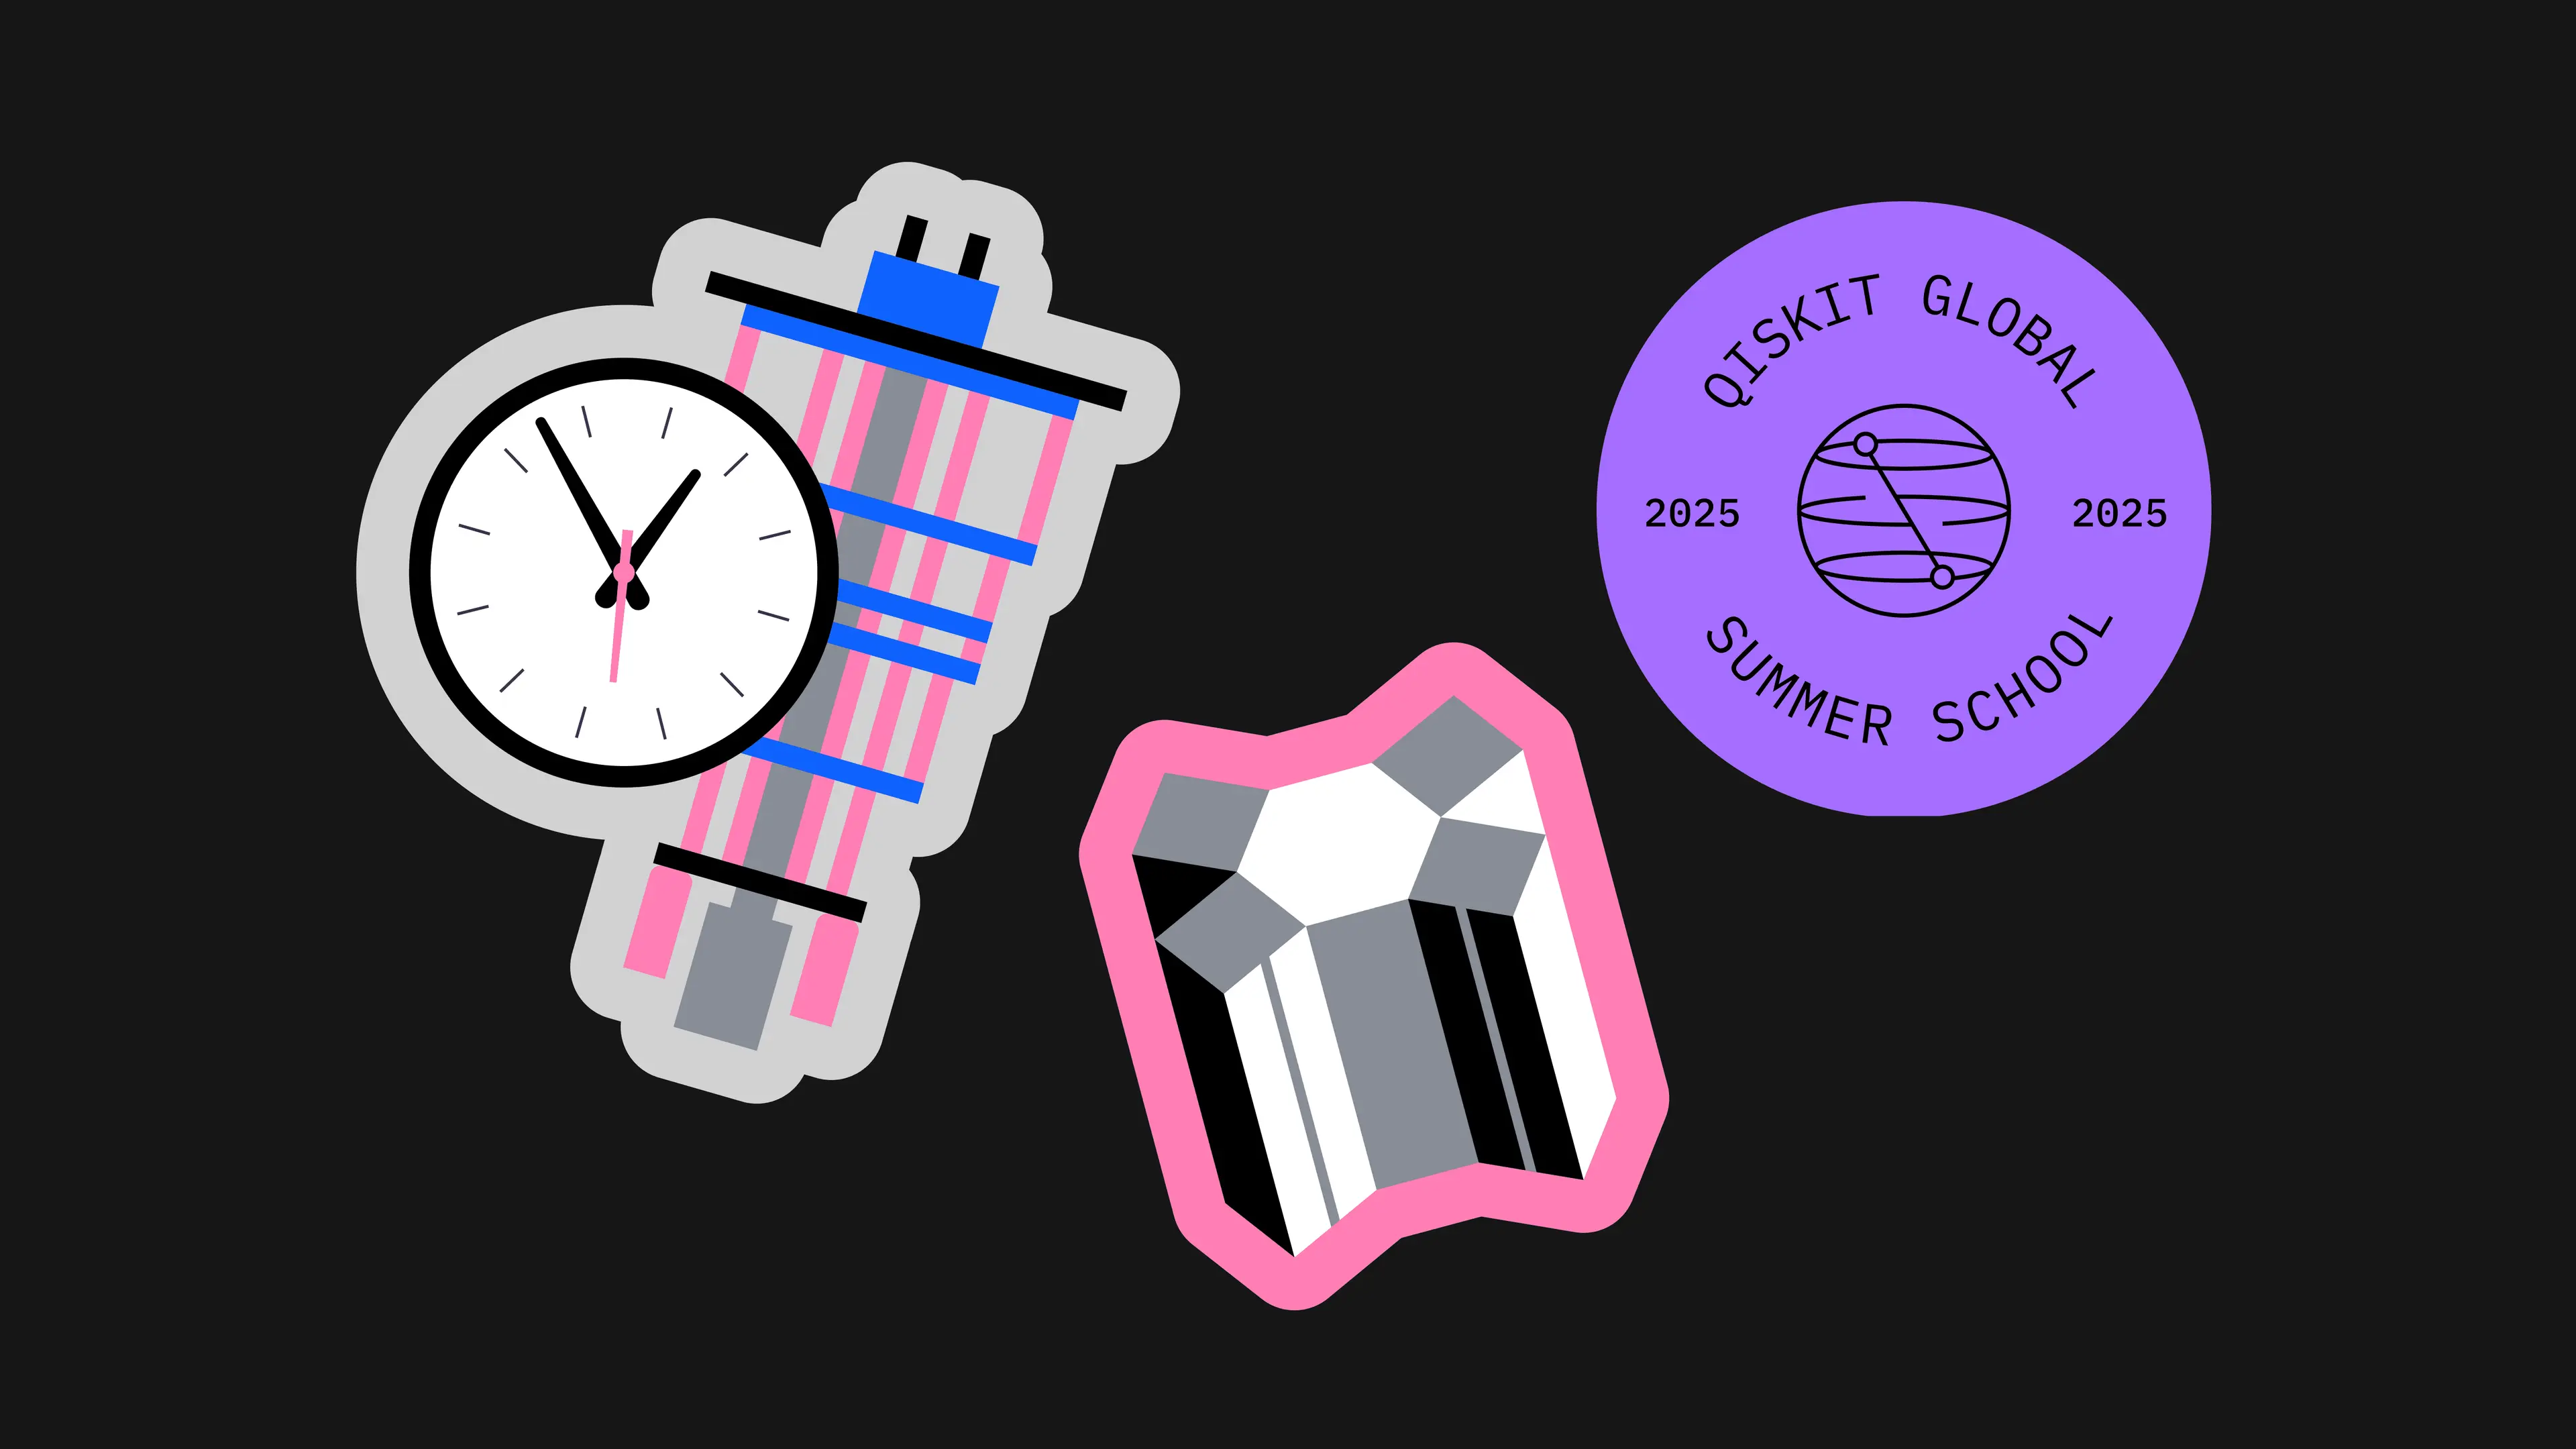

詳細ご案内ブログ：https://www.ibm.com/quantum/blog/qiskit-summer-school-2025

In [ ]:
# Qiskitバージョンの確認
import qiskit
qiskit.__version__